In [1]:
from collections import defaultdict
import json
import glob
import os
import sys
from typing import Tuple

import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd

from source import load_avenio_files
from fragment_count.utils import dict_sum, as_dataframe, pool_counts_to_dataframe
from fragment_count.views import plot_distribution_comparison, plot_distribution

In [2]:
patient_mutations, clinical_data = load_avenio_files()

In [3]:
respond = clinical_data['response_grouped'] == 'responder (pr+cr)'
response_id = clinical_data[respond].index
non_response_id = clinical_data[~respond].index

In [4]:
response_samples = []
non_response_samples = []

for ptid in response_id:
    response_samples += glob.glob(f'fragment_count/output/tumor_derived/{ptid}*.json')
    
for ptid in non_response_id:
    non_response_samples += glob.glob(f'fragment_count/output/tumor_derived/{ptid}*.json')

In [5]:
resp_normal, resp_var = pool_counts_to_dataframe(response_samples)
non_resp_normal, non_resp_var = pool_counts_to_dataframe(non_response_samples)

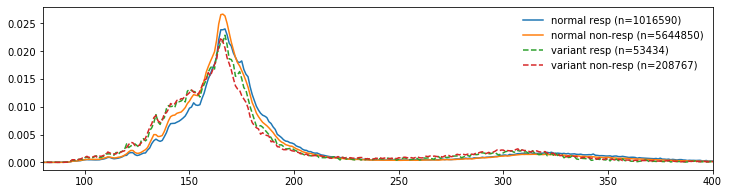

In [10]:
plt.figure(figsize=(12,3))
figure_labels = {
    'resp_normal': f'normal resp (n={resp_normal.sum().sum()})',
    'non_resp_normal': f'normal non-resp (n={non_resp_normal.sum().sum()})',
    'resp_variant': f'variant resp (n={resp_var.sum().sum()})',
    'non_resp_variant': f'variant non-resp (n={non_resp_var.sum().sum()})',
}
with mpl.rc_context(rc={'lines.linestyle':'-'}):
    plot_distribution(
        resp_normal.sum(axis=1), 
        label=figure_labels['resp_normal'], 
        with_peaks=False,
    )
    plot_distribution(
        non_resp_normal.sum(axis=1), 
        label=figure_labels['non_resp_normal'], 
        with_peaks=False,
    )
# with plt.style.context('linestyle'):
with mpl.rc_context(rc={'lines.linestyle':'--'}):
    plot_distribution(
        resp_var.sum(axis=1), 
        label=figure_labels['resp_variant'], 
        with_peaks=False,
    )
    plot_distribution(
        non_resp_var.sum(axis=1), 
        label=figure_labels['non_resp_variant'], 
        with_peaks=False,
    )
    plt.legend(frameon=False)
plt.savefig('figs/distributions_with_response.png')

In [15]:
resp_normal

,ALK,APC,AR,ARAF,BRAF,BRCA1,BRCA2,CCND2,CDKN2A,CSF1R,...,RB1,RET,RNF43,ROS1,SMAD4,SMO,STK11,TERT,TP53,TSC2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
853,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
854,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
855,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


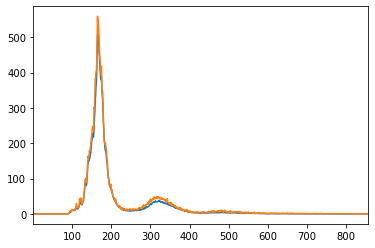

In [14]:
# resp_norm_distribution = resp_normal / resp_normal.sum()
resp_normal.mean(axis=1).plot()
resp_normal.std(axis=1).plot()

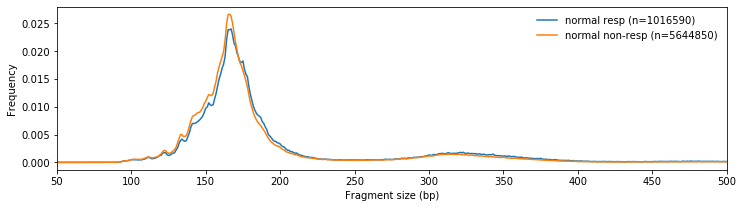

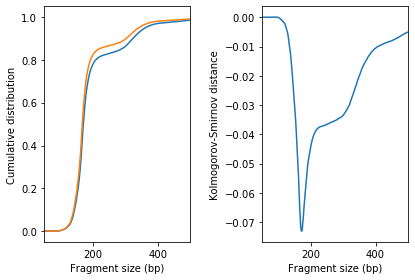

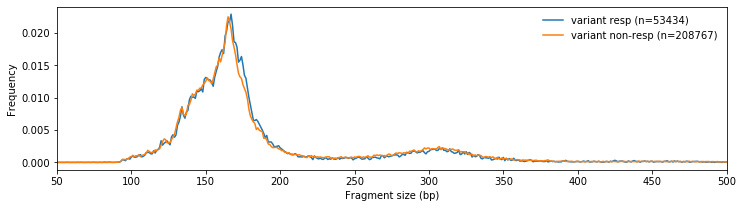

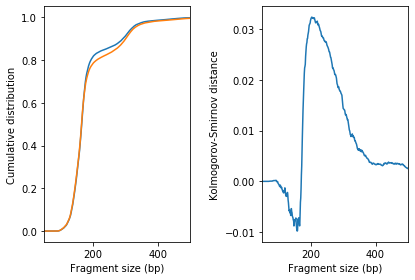

In [12]:
plt.figure(figsize=(12,3))
plot_distribution_comparison(
    resp_normal.sum(axis=1), 
    non_resp_normal.sum(axis=1),
    labels=[figure_labels['resp_normal'], figure_labels['non_resp_normal']],
    filename_suffix='response_normal',
)
plt.savefig('figs/normal_response.png')
plt.figure(figsize=(12,3))
plot_distribution_comparison(
    resp_var.sum(axis=1), 
    non_resp_var.sum(axis=1),
    labels=[figure_labels['resp_variant'], figure_labels['non_resp_variant']],
    filename_suffix='response_variant',
)
plt.savefig('figs/variant_response.png')